Características 
Extracción de frases nominales

Etiquetado de partes del discurso

Análisis de sentimientos

Clasificación (Bayes ingenuo, árbol de decisión)

Tokenización (división del texto en palabras y oraciones)

Frecuencias de palabras y frases

Analizando

n-gramos

Flexión de palabras (pluralización y singularización) y lematización

Corrección ortográfica

Añadir nuevos modelos o idiomas a través de extensiones

Integración con WordNet

In [5]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for httpx==0.13.3 from https://files.pythonhosted.org/packages/54/b4/698b284c6aed4d7c2b4fe3ba5df1fcf6093612423797e76fbb24890dd22f/httpx-0.13.3-py3-none-any.whl.metadata
  Obtaining dependency information for hstspreload from https://files.pythonhosted.org/packages/a2/f1/66d2133cbfcff3c0d2354868073ea4190ae3e823095644aaad9bce35cd75/hstspreload-2024.10.1-py3-none-any.whl.metadata
  Obtaining dependency information for chardet==3.* from https://files.pythonhosted.org/packages/bc/a9/01ffebfb562e4274b6487b4bb1ddec7ca55ec7510b22e4c51f14098443b8/chardet-3.0.4-py2.py3-none-any.whl.metadata
  Obtaining dependency information for idna==2.* from https://files.pythonhosted.org/packages/a2/38/928ddce2273eaa564f6f50de919327bf3a00f091b5baba8dfa9460f3a8a8/idna-2.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for rfc3986<2,>=1.3 from https://files.

In [11]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   - -------------------------------------- 30.7/626.3 kB ? eta -:--:--
   ------ ------------------------------- 112.6/626.3 kB 502.0 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/626.3 kB 502.0 kB/s 

In [15]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator

In [25]:
def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")  #en español guardeme en ingles
    return strEngComment.text #ACA ESTA ALMACENADO EL TEXTO trabaja hasta que se ingrese el valor a trabajr 
#en el translate guarda el texto

#Polaridad grado de comentario sentimiento neg pos y neutro 

def getPolarity(strComment: str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity

#Retorna polaridad que determina como esta constituido 
#cometarios.csv
df= pd.read_csv("C:/Users/D/Downloads/Comentarios.csv")
df['Polaridad']= df['Comentario'].apply(getPolarity) #aplica funcion de polaridad

df.to_csv('resultados.csv', index=False)


In [21]:
df.columns

Index(['Comentario'], dtype='object')

In [29]:
df =pd.read_csv('resultados.csv')
df
#Expresiones regulares tratan errores comentarios emojis se extraen y se limpian 

,Comentario,Polaridad
0,La comida fue excelente y el servicio fue exce...,0.333333
1,El ambiente era agradable y la comida estaba d...,0.261458
2,"La comida estaba bien, pero el servicio fue le...",-0.012393
3,"No me gustó la comida, estaba fría y el sabor ...",-0.475000
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.200000
68,"La comida está bien, pero el ambiente no es mu...",0.067308
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [55]:
def translateComment(strComment:str):
    translator = Translator()
    strEngComment = translator.translate(strComment, src="es", dest="en")  #en español guardeme en ingles
    return strEngComment.text #ACA ESTA ALMACENADO EL TEXTO trabaja hasta que se ingrese el valor a trabajr 
#en el translate guarda el texto

#Polaridad grado de comentario sentimiento neg pos y neutro 

def getPolarity(strComment: str):
    strComment = translateComment(strComment)
    analysis = TextBlob(strComment)
    return analysis.sentiment.polarity
############

# Función casificar el sentimiento
def classifySentiment(polarity: float):
    if polarity > 0:
        return 'Positivo'
    elif polarity < 0:
        return 'Negativo'
    else:
        return 'Neutral'

# Leer el archivo CSV
df2 = pd.read_csv("C:/Users/D/Downloads/Comentarios.csv", sep=';', on_bad_lines='skip')

# Aplicando la función de polaridad y clasificar el sentimiento
df2['Polaridad'] = df2['Comentario'].apply(getPolarity)  # Aplica función de polaridad
df2['Sentimiento'] = df2['Polaridad'].apply(classifySentiment)  # Clasifica el sentimiento

# Guardar el DataFrame en un nuevo archivo CSV
df2.to_csv('resultadosCopy.csv', index=False)
#Retorna polaridad que determina como esta constituido 
#cometarios.csv

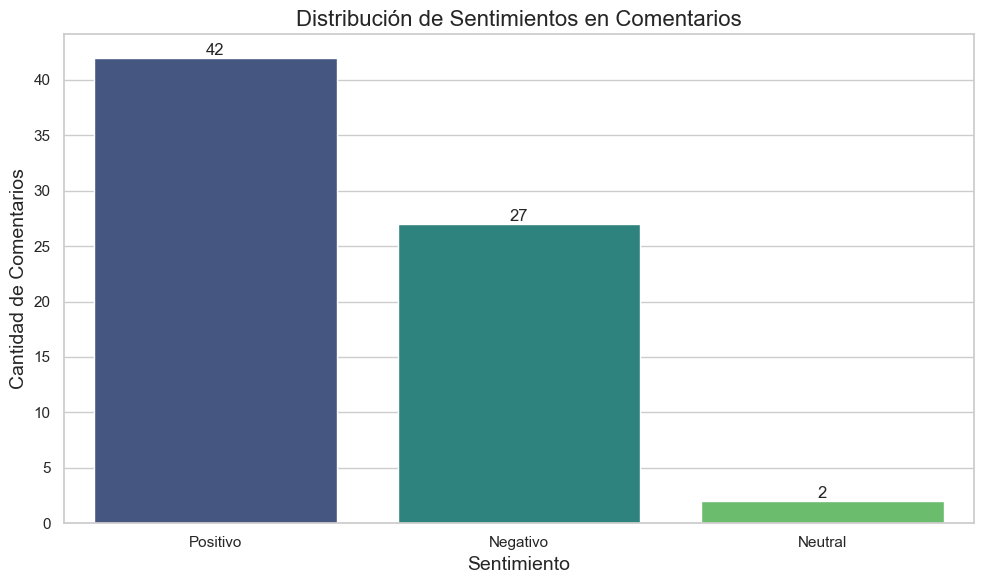

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
# cuenta cantidad de comentarios en cada categoría de sentimiento
sentiment_counts = df2['Sentimiento'].value_counts()

#grafico
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title('Distribución de Sentimientos en Comentarios', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Cantidad de Comentarios', fontsize=14)
# valores en las barras
for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [43]:
df2 =pd.read_csv('resultadosCopy.csv')
df2

,Comentario,Polaridad
0,La comida fue excelsa y el servicio fue excepc...,0.333333
1,El ambiente era super y la comida estaba delic...,0.161458
2,"La comida estaba bien, pero el servicio fue le...",-0.012393
3,"Me encanto la comida, estaba fría y el sabor n...",-0.083333
4,El peor restaurante en el que he estado. No lo...,-1.000000
...,...,...
66,Siempre disfruto venir aquí. La comida es deli...,0.629167
67,"Buen lugar para cenar, aunque el servicio pued...",0.200000
68,"La comida está bien, pero el ambiente no es mu...",0.067308
69,No me gustó la comida y el servicio fue muy de...,-0.520000


In [45]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


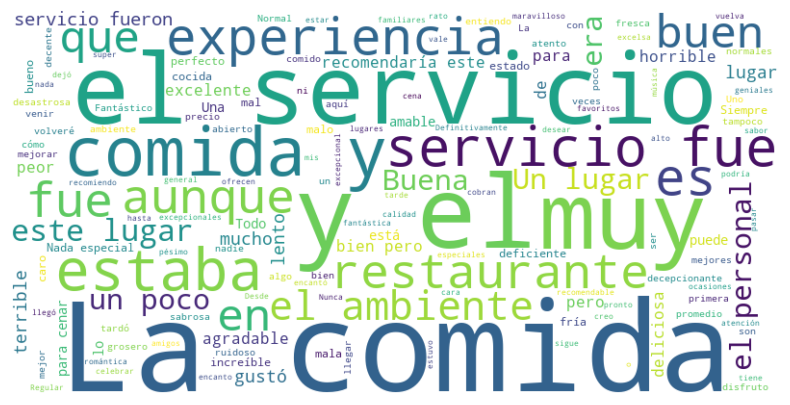

In [49]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv("C:/Users/D/Downloads/Comentarios.csv", sep=';', on_bad_lines='skip')

# Combinar todos los comentarios en un solo texto
text = ' '.join(df['Comentario'].tolist())

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()

In [51]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Descargar recursos de VADER (solo la primera vez)
nltk.download('vader_lexicon')

# Cargar el dataset
df = pd.read_csv("C:/Users/D/Downloads/Comentarios.csv", sep=';', on_bad_lines='skip')

# Inicializar el analizador de sentimientos
sia = SentimentIntensityAnalyzer()

# Aplicar análisis de sentimientos
df['Sentimiento'] = df['Comentario'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Guardar resultados
df.to_csv('resultados_sentimientos.csv', index=False)

# Mostrar los primeros resultados
print(df.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\D\AppData\Roaming\nltk_data...


                                          Comentario  Sentimiento
0  La comida fue excelsa y el servicio fue excepc...       0.0000
1  El ambiente era super y la comida estaba delic...       0.5994
2  La comida estaba bien, pero el servicio fue le...       0.0000
3  Me encanto la comida, estaba fría y el sabor n...      -0.2960
4  El peor restaurante en el que he estado. No lo...      -0.2960


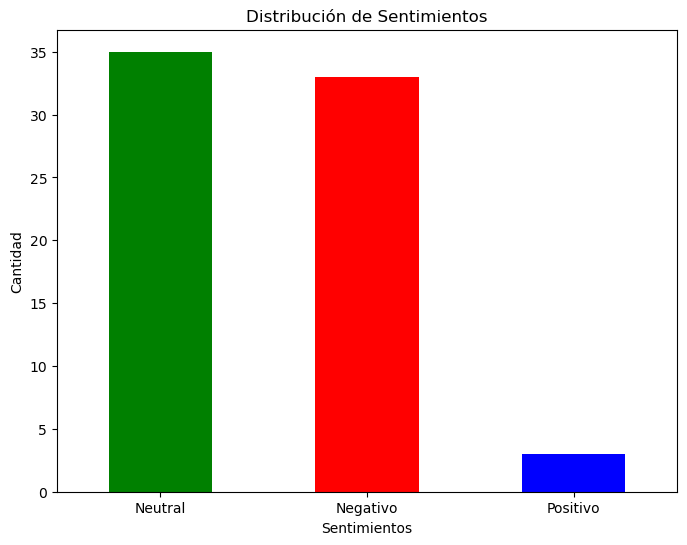

In [53]:
import matplotlib.pyplot as plt
##Visualizacion 
# Clasificar sentimientos
df['Clasificación'] = df['Sentimiento'].apply(lambda x: 'Positivo' if x > 0 else ('Negativo' if x < 0 else 'Neutral'))

# Contar clasificaciones
conteo = df['Clasificación'].value_counts()

# Graficar
plt.figure(figsize=(8, 6))
conteo.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribución de Sentimientos')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#IMPORT LIBRERIAS 
import pandas as pd #analisis y manipulación de datos 
import sqlite3 #libreria con Sistema de Gestion de Bases de Datos Relacional 